In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
dataset = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
dataset.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [ ]:
dataset['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
dataset.drop(columns='customerID',inplace=True)

In [ ]:
dataset.head(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')


In [ ]:
dataset['TotalCharges'].isnull().sum()

11

<Axes: xlabel='TotalCharges', ylabel='Density'>

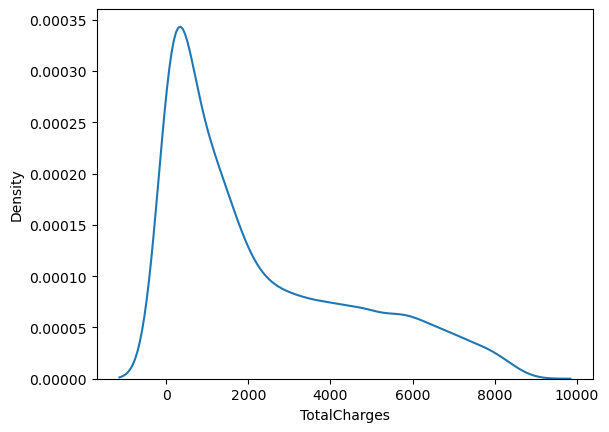

In [ ]:
sns.kdeplot(dataset['TotalCharges'])

In [ ]:
dataset['TotalCharges']=dataset['TotalCharges'].fillna(dataset['TotalCharges'].median())

In [ ]:
q1=dataset['TotalCharges'].quantile(0.25)

In [ ]:
q3=dataset['TotalCharges'].quantile(0.75)

In [ ]:
iqr=q3-q1

In [ ]:
lower=q1-(1.5*iqr)

In [ ]:
upper=q3+(1.5*iqr)

In [ ]:
dataset=dataset[(dataset['TotalCharges']>=lower) &  (dataset['TotalCharges'] <= upper)]

<Axes: xlabel='TotalCharges'>

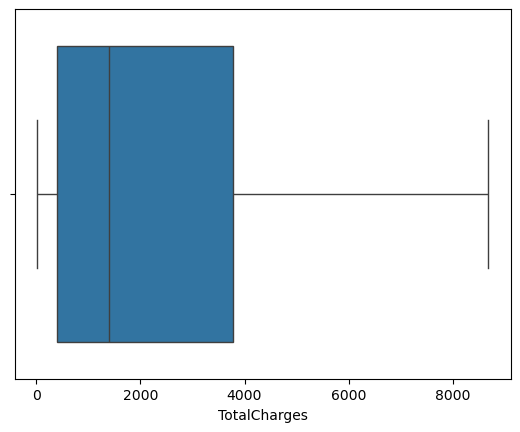

In [ ]:
sns.boxplot(x=dataset['TotalCharges'])

### printing the unique value

In [ ]:
l1=["tenure","MonthlyCharges","TotalCharges"]

for col in dataset.columns:
    if col not in l1 :
        print(col,dataset[col].unique())
        print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [ ]:
dataset["TotalCharges"].isnull().sum()

0

### 3. EDA

In [ ]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Numerical Feature - Analysis

In [ ]:
def plot_histo(df,column_name):

    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    plt.title(f"Distribution of {column_name}")

    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
    plt.axvline(col_median,color="green",linestyle="-",label="Median")

    plt.legend()
    plt.show()
    

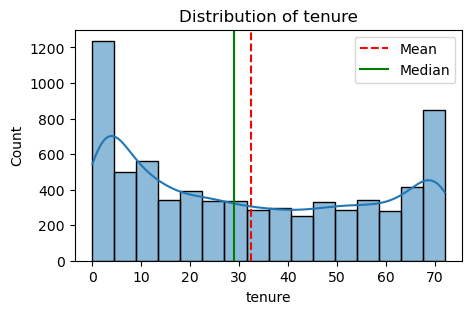

In [ ]:
plot_histo(dataset,"tenure")

### Box Plot for numerical features

In [ ]:
def plot_boxplot(df,column_name):

    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.show()

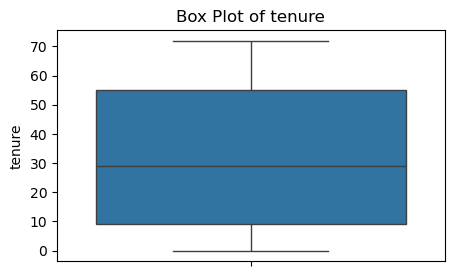

In [ ]:
plot_boxplot(dataset,"tenure")

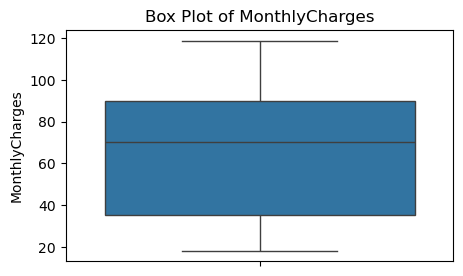

In [ ]:
plot_boxplot(dataset,"MonthlyCharges")

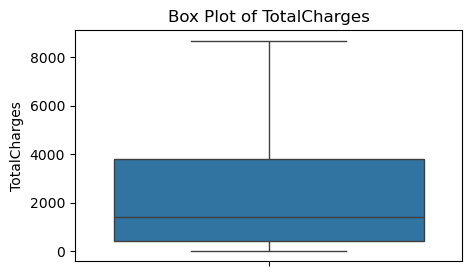

In [ ]:
plot_boxplot(dataset,"TotalCharges")

### Corrleation Heatmap for numerical columns

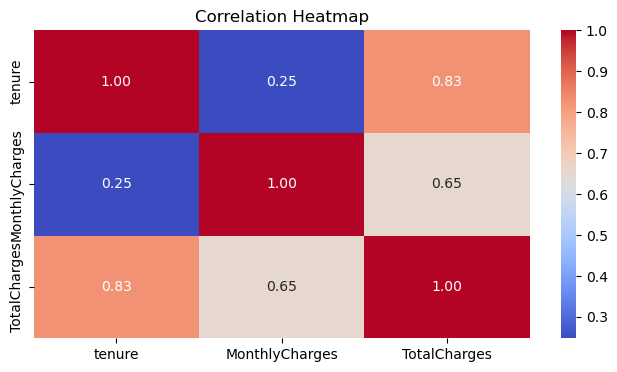

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(dataset[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 4. Data Preprocessing

In [ ]:
dataset.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
dataset["Churn"]=dataset["Churn"].replace({"Yes":1,"No":0})

C:\Users\hp\AppData\Local\Temp\ipykernel_4088\405908849.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["Churn"]=dataset["Churn"].replace({"Yes":1,"No":0})


In [ ]:
dataset.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [ ]:
obj_col=dataset.select_dtypes(include="object").columns

In [ ]:
obj_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
# Intialize a dictionary to save the encoders
encoders={}
from sklearn.preprocessing import LabelEncoder
for col in obj_col:
    le=LabelEncoder()
    dataset[col]=le.fit_transform(dataset[col])
    encoders[col]=le

# save the encoders to a pickle file
import pickle
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Training and test data split


In [ ]:
x=dataset.iloc[:,:-1]
y=dataset["Churn"]

In [ ]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
# split training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train.shape

(5634,)

In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=42)


In [ ]:
x_train_smote,y_train_smote=sm.fit_resample(x_train,y_train)

In [ ]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

### 5. Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(random_state=12)
df={"criterion" : ["gini", "entropy", "log_loss"],"splitter" : ["best", "random"],
    "max_depth":[i for i in range(2,20)]}

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
gd=GridSearchCV(DecisionTreeClassifier(),param_grid=df)
gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [ ]:
gd.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [ ]:
gd.best_score_

0.7898472973249845

In [ ]:
rd=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=df,n_iter=20)
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [ ]:
rd.best_params_

{'splitter': 'best', 'max_depth': 5, 'criterion': 'gini'}

In [ ]:
rd.best_score_

0.7898472973249845

In [ ]:
## CHECKING RANDOM FOREST HYPERPARAMETER
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
## WE GO WITH GRIDSEARCHCV ATTRIBUTE


In [ ]:
models={
    "Decision Tree": DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='best',random_state=42),
    "Random Forest Tree": RandomForestClassifier(random_state=12,max_depth=5,max_features='sqrt',n_estimators=100)
    
}
cv_score={}

for model_name,model in models.items():
    print(f"Training {model_name}")
    scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring="accuracy")
    cv_score[model_name]=scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("-"*70)

Training Decision Tree
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest Tree
Random Forest Tree cross-validation accuracy: 0.80
----------------------------------------------------------------------


In [ ]:
cv_score

{'Decision Tree': array([0.71316425, 0.74682779, 0.81208459, 0.81691843, 0.81087613]),
 'Random Forest Tree': array([0.73731884, 0.76132931, 0.83987915, 0.83383686, 0.82960725])}

### Random Forest gives the highest accuracy compared to other models with default parameters

In [ ]:
rfc=RandomForestClassifier(random_state=12,max_depth=5,max_features='sqrt',n_estimators=100)

In [ ]:
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, random_state=12)

In [ ]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

### 6. Model Evaluation

In [71]:
y_test_pred=rfc.predict(x_test)


print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7700496806245565
Confsuion Matrix:
 [[784 252]
 [ 72 301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83      1036
           1       0.54      0.81      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



In [74]:
# save the trained model as a pickle file
model_data={"model":rfc,"features_names":x.columns.tolist()}

with open("customer_churn_model.pkl","wb") as f:
    pickle.dump(model_data,f)

In [75]:
#Load the save model and the features names

In [76]:
with open("customer_churn_model.pkl","rb") as f:
    model_data=pickle.load(f)
loaded_model = model_data["model"]
feature_names=model_data["features_names"]

In [77]:
print(loaded_model)

RandomForestClassifier(max_depth=5, random_state=12)


In [79]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [82]:
input_data={
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner':'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df=pd.DataFrame([input_data])

with open("encoders.pkl","rb") as f:
    encoders = pickle.load(f)

# encode categorical features using the saved encoders

for column,encoder in encoders.items():
    input_data_df[column]=encoder.transform(input_data_df[column])

# make a prediction
prediction=loaded_model.predict(input_data_df)
pred_prob=loaded_model.predict_proba(input_data_df)

print(prediction)


# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")


[1]
Prediction: Churn
Prediciton Probability: [[0.28105344 0.71894656]]
